# 背景概述

$\quad$1865年, 俄国化学家[门捷列夫(Mendeleev)](https://en.wikipedia.org/wiki/Dmitri_Mendeleev)根据相对原子质量的增长关系所呈现的周期性, 发表了最早版本的[元素周期表(periodic table)](https://en.wikipedia.org/wiki/Periodic_table). 在本次上机作业中, 我们将根据若干元素的原子参数数据, 尝试挖掘这些化学元素中的内禀规律, 并作一个简单的聚类分析.
- 参考文献: [J. Chem. Educ. 2020, 97, 6, 1666–1676](https://pubs.acs.org/doi/10.1021/acs.jchemed.9b00924).

# 数据读取与清洗

$\quad$**任务1**: 在`src/data.py`文件中, 编写函数`preprocess_chem_elements`, 读取`data`目录下的`chem_elements.csv`数据集, 并完成预处理.
  - 输入:
    - `raw_data`: 原始数据(缺失值已丢弃, 无需额外处理), 为一个`pd.DataFrame`对象;
    - `feature_cols`: 一个列表, 用于下游降维/聚类任务的特征列名;
    - `idx_col`: 字符串, 用作新的数据表的列名.
  - 要求执行的数据处理步骤:
    - 以[正确的格式](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)(注意分隔符为`;`)读入原始数据, 并丢弃含缺失数据的那些化学元素;
    - 根据给定的`idx_col`重新设置表格索引, 并将原索引丢弃;
    - 挑选出原始数据中的`feature_cols`列、并作[均值-方差归一化](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).
  - 返回:
    - 一个处理好的、只含`feature_cols`列的(归一化)数据表, 索引按`idx_col`确定;
    - 相应的元素类别(例如: 碱金属、过渡金属、非金属, 等等), 体现在原表格的`GroupBlock`一列(该信息稍后会用到).

### 提示

- 丢弃缺失值可以参考[`df.dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)方法;
- 索引重置可以参考[`df.reset_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index)方法;
- 可以复习前2次上机作业对于`pandas`库的介绍.

$\quad$完成任务1后, 请运行下面的代码块, 检查你处理好的数据表`X`. 我们所选取的特征包括:
- 原子质量`AtomicMass`, 单位u;
- 原子半径`AtomicRadius`, 采取[van der Waals半径](https://en.wikipedia.org/wiki/Van_der_Waals_radius), 单位pm;
- 电离能`IonizationEnery`, 单位eV;
- 电子亲合能`ElectronAffinity`, 单位eV;
- 电负性`Electronegativity`, 采取[Pauling标度](https://en.wikipedia.org/wiki/Electronegativity#Pauling_electronegativity);
- 熔点`MeltingPoint`, 单位K;
- 沸点`BoilingPoint`, 单位K;
- 单质密度`Density`, 单位g/mL.

In [1]:
from src.data import preprocess_chem_elements

feature_cols = [
    "AtomicMass",
    "AtomicRadius",
    "IonizationEnergy",
    "ElectronAffinity",
    "Electronegativity",
    "MeltingPoint",
    "BoilingPoint",
    "Density"
]
X, group_blocks = preprocess_chem_elements(
    'data/chem_elements.csv',
    feature_cols=feature_cols
)
X

,AtomicMass,AtomicRadius,IonizationEnergy,ElectronAffinity,Electronegativity,MeltingPoint,BoilingPoint,Density
Symbol,,,,,,,,
H,-1.484785,-2.243779,2.194844,-0.369949,0.341005,-1.303907,-1.613774,-1.241627
Li,-1.388654,-0.464566,-1.127539,-0.527923,-1.650809,-0.892769,-0.650228,-1.154716
B,-1.327530,-0.177596,0.049020,-0.924018,0.079783,0.877964,0.955764,-0.855850
C,-1.308262,-0.808930,1.248252,0.221290,0.912427,2.256712,0.850027,-0.872616
O,-1.244282,-1.325476,2.202941,0.451281,2.365472,-1.266003,-1.571528,-1.241409
F,-1.196168,-1.813325,3.743481,2.632710,3.247094,-1.266779,-1.574651,-1.241365
Na,-1.132140,0.826798,-1.229972,-0.609233,-1.732441,-0.970072,-0.927560,-1.083744
Al,-1.068096,-0.407172,-0.887045,-0.733521,-0.622249,-0.444291,0.060928,-0.802132
Si,-1.050384,0.338949,-0.010091,0.363002,-0.148785,0.260098,0.511669,-0.862524


# 数据的主元分析

$\quad$在本节, 我们以PCA模型进行数据降维, 并对前两个主元作相应的可视化分析.

$\quad$**任务2**: 在`src/models.py`文件中, 编写函数`get_pc_info`, 对数据`X`作PCA模型的训练与变换, 并提取相应的信息.
  - 输入:
    - 数据`X`和PCA组分数`n_components`.
  - 返回一个三元组, 其元素依次为:
    - 降维后的数据`X_reduced`, 形状应为`(n_samples, n_components)`;
    - 各个主元的方差解释比例`explained_variance_ratio`;
    - 主元变换矩阵`components`, 形状为`(n_components, n_features)`.

$\quad$完成任务2后, 请运行下面的代码进行检查.

In [2]:
from src.models import get_pc_info
X_reduced, explained_variance_ratio, components = get_pc_info(X)
X_reduced.shape, explained_variance_ratio.shape, components.shape

((53, 2), (2,), (2, 8))

$\quad$**任务3**: 运行下面两个代码块, 根据给定的函数`plot_pc1_pc2`完成可视化分析, 回答下面的问题:

- **问题3.1**: 观察左图. 这是二维隐空间中样本的散点分布. 四个象限的元素各自以哪一类为主? 请作出分配: (a) 过渡金属元素; (b) 主族金属元素; (c) 主族非金属元素; (d) 卤素.
- **问题3.2**: 观察右图, 这是将变换矩阵的每一列(作为二维向量)画成矢量给出的**载荷图**(loading plot). 两个向量朝向相近表明它们之间存在某种内禀共性.
  - **问题3.2.1**: 第一象限聚集的那些原始特征大多与元素的什么性质有关? 请作出选择: (a) 原子聚集行为; (b) 原子核对电子的吸引能力.
  - **问题3.2.2**: 第二象限聚集的那些原始特征大多与元素的什么性质有关? 请作出选择: (a) 原子聚集行为; (b) 原子核对电子的吸引能力.
  - **问题3.2.3**: 第三象限只分布有一个原始特征, 它与第一象限的那些特征具有较强的“负相关性”, 请作出简单解释.

In [3]:
from matplotlib import pyplot as plt

def plot_pc1_pc2(X_reduced, explained_variance_ratio, components, idxs, feature_cols):
    _, (ax1, ax2) = plt.subplots(1, 2, layout="constrained", figsize=(10, 4))
    # sample plot
    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1])
    ax1.set_aspect('equal', adjustable='box')
    ax1.axhline(y=0, linestyle="--")
    ax1.axvline(x=0, linestyle="--")
    for i, idx in enumerate(idxs):
        ax1.annotate(idx, (X_reduced[i, 0], X_reduced[i, 1]))
    # loading plot
    ax2.add_patch(plt.Circle((0, 0), 1.0, fill=False, edgecolor="red", linestyle="--"))
    n_features = components.shape[1]
    for i in range(n_features):
        ax2.arrow(0, 0, components[0, i], components[1, i], head_width=0.05)
        ax2.annotate(feature_cols[i], (components[0, i] - 0.25, components[1, i]), fontsize=8)
    ax2.axhline(y=0, linestyle="--")
    ax2.axvline(x=0, linestyle="--")
    ax2.set_aspect('equal', adjustable='box')
    # title, axes, and annotation
    ratio1, ratio2 = explained_variance_ratio
    ax1.set_title("Samples in latent space")
    ax1.set_xlabel(f"PC1({ratio1 * 100:.2f}%)")
    ax1.set_ylabel(f"PC2({ratio2 * 100:.2f}%)")
    ax2.set_title("Loading plot")
    ax2.set_xlabel(f"PC1({ratio1 * 100:.2f}%)")
    ax2.set_ylabel(f"PC2({ratio2 * 100:.2f}%)")
    plt.show()

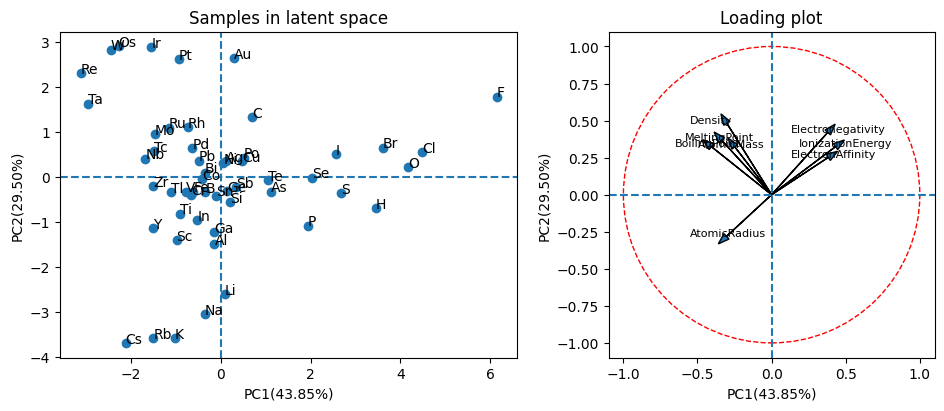

In [4]:
plot_pc1_pc2(X_reduced, explained_variance_ratio, components, X.index, feature_cols)

# 隐空间上的聚类分析

$\quad$我们在降维后的隐空间上进行k-means聚类, 并对聚类结果进行评估. 具体试验的降维算法将包括PCA、Isomap与t-SNE, 均控制为降到3维. 由于聚类分析是非监督的, 它没有类似“准确率”这样的评估指标, 本节我们采取的指标有两个:
- (调整的)随机指数相似性, 以[`adjusted_rand_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)方法实现. 这一指标适合本例的情形, 即存在一组真实标签作为对照. 该指标大致可以理解为真实标签与预测标签在“分配结构”上的相似性.
- **轮廓系数**(silhouette coefficient), 以[`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)方法实现. 该指标大致可以理解为簇间轮廓的清晰程度(的样本平均), 计算公式为:
  $$
  S := \frac{1}{N}\sum_{n=1}^N{\frac{b_n - a_n}{\max{\{a_n, b_n\}}}},
  $$
  其中, $n = 1, \dots, N$遍历所有数据样本, $a_n, b_n$分别表示样本$n$到点$A_n, B_n$的距离. 其中, 点$A_n$为样本$n$所在的簇中心, 点$B_n$为样本$n$所不在的、最近邻的簇中心.

**任务4**: 在`src/models.py`文件中, 编写函数`cluster_on_latent_space`, 对给定的数据`X`利用`reduction_model`进行降维, 再以k-means方法进行聚类分析, 并对聚类结果进行评估.
  - 输入:
    - `X`, 待降维的数据;
    - `reduction_model`, 用于降维的模型;
    - `y_true`, 真实标签, 本例取为原始表格中的`GroupBlock`一列, 代表元素类别;
    - `n_clusters`: 簇的个数. 为了与真实标签保持统一, 本例默认值取为7, 无需修改.
    - `random_state`: 用于运行k-means算法的随机数种子. 默认取42, 无需修改.
  - 返回一个二元组, 包括随机指数相似性以及轮廓系数.

$\quad$完成任务3后, 你可以运行下面的代码块, 对PCA、Isomap和t-SNE的聚类结果进行综合评估.

In [5]:
from src.models import cluster_on_latent_space

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.preprocessing import LabelEncoder

metrics = pd.DataFrame(columns=["rand_acc", "silhouette_coeff"], index=["PCA", "Isomap", "t-SNE"])
y_true = LabelEncoder().fit_transform(group_blocks)
n_components = 3
for reduction_model, name in (
    (PCA(n_components=n_components), "PCA"),
    (Isomap(n_components=n_components), "Isomap"),
    (TSNE(n_components=n_components, init="pca", learning_rate="auto", perplexity=30), "t-SNE")
):
    rand_acc, silhouette_coeff = cluster_on_latent_space(X, reduction_model, y_true)
    metrics.loc[name, "rand_acc"] = rand_acc
    metrics.loc[name, "silhouette_coeff"] = silhouette_coeff

metrics

,rand_acc,silhouette_coeff
PCA,0.348874,0.315378
Isomap,0.317526,0.369833
t-SNE,0.046624,0.184828
